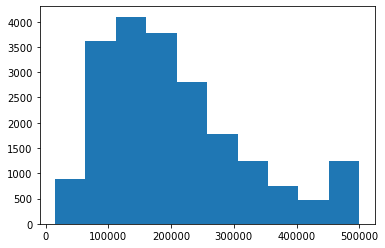

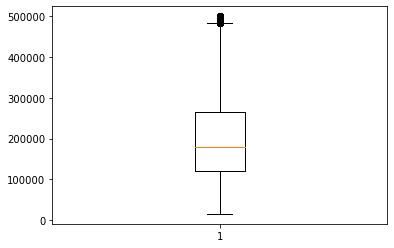

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("California_Houses.csv")
plt.hist(df["Median_House_Value"])

plt.show()
plt.boxplot(df["Median_House_Value"])
plt.show()

In [2]:
print(df.head())

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733070   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0     556529.1583           735501.8070          67432.517

In [ ]:
plt.hist(df["Distance_to_LA"],alpha=0.7,bins=50)
plt.hist(df["Distance_to_SanFrancisco"],alpha=0.7,bins=50)
plt.legend(["Distance_to_LA", "Distance_to_SanFrancisco"])
plt.show()